In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('X_openingg.csv')

In [3]:
y = X['worldwide_gross']

In [4]:
X = X.drop('worldwide_gross', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [6]:
print(len(X))
print(len(X_train))
print(len(X_test))

2221
1332
889


In [7]:
from sklearn.linear_model import Lasso

model = Lasso()

In [8]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
predicted = model.predict(X_test)

In [10]:
predicted.shape

(889,)

([array([700., 143.,  30.,   8.,   7.,   1.,   0.,   0.,   0.,   0.]),
  array([704., 133.,  34.,  12.,   3.,   1.,   1.,   0.,   0.,   1.])],
 array([-1.02894600e+08,  1.85786758e+08,  4.74468116e+08,  7.63149474e+08,
         1.05183083e+09,  1.34051219e+09,  1.62919355e+09,  1.91787491e+09,
         2.20655627e+09,  2.49523762e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

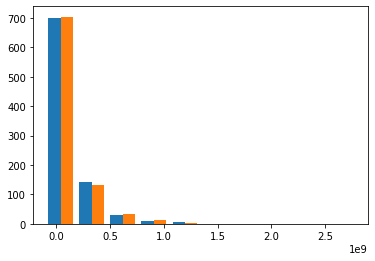

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist([predicted, y_test])

El score R2 de una regresión es una de las formas más comunes de entender su poder predictivo. Este mientras más cerca de 1 este, mejor es.

Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media.

In [12]:
model.score(X_test, y_test)

0.7796936832350332

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión.Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades.

Siempre hay que visualizar tus resultados, aunque tengas un buen score de performance.

In [13]:
#los residuales son muy importantes en las regresiones. DIFERENCIA ENTRE LA PREDICCIÓN Y EL VALOR REAL.

residuals = - y_test - predicted 

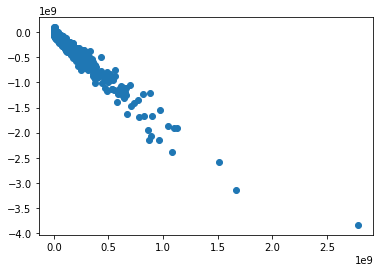

In [14]:
#En funcion del ingreso que está en X vamos a ver qué tanto error hay. Se ve bastante bien centrado en 0.
#Algunos puntos alejados pero en gral buscamos que no se vean patrones aparentes. Si no hay patrones está bien.

plt.scatter(y_test, residuals)

In [15]:
#vamos a ver los errores en porecentajes, mas que en valor absoluto.

ap_residuals = np.abs(residuals) / y_test

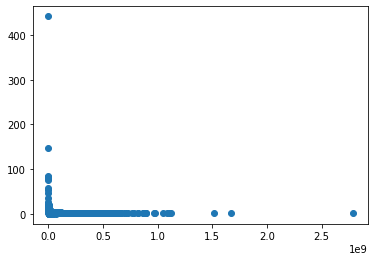

In [16]:
#Tenemos casi todo en cero pero para las peliculas pequeñas si hay unos errores en porcentajes altos.
#Como tengo todo concentrado en 0 no puedo ver muy bien los puntos alejados. La diferencia de escalas hace que la visualización no se buena
#Entonces voy a ocupar una escala logaritimica en la sig celda

plt.scatter(y_test, ap_residuals)

In [17]:
#ocupar una escala logaritimca. el logaritmo siempre compacta los datos y permite ver las cosas como en orden de magnitud en vez de verlas en forma absoluta


lap_residuals = np.log(ap_residuals)

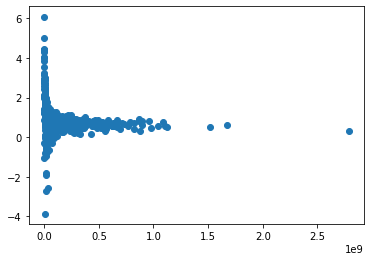

In [18]:
#grafico en escala logaritmica: nuestros puntos estan muy concentrados en 0. las peliculas de bajo presupuesto se escapan más (ganan mas de lo esperado) 


plt.scatter(y_test, lap_residuals)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


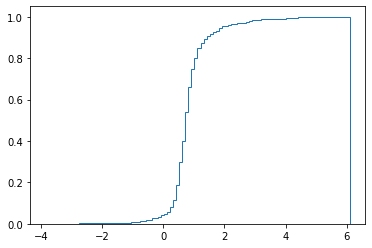

In [19]:
#evaluación numérica de nuestros errores: función acumulativa de la distribución de los errores.

#la evolución del error de nuestras medidas

plt.hist(lap_residuals, bins = 100, normed=1, histtype='step', cumulative=True);

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

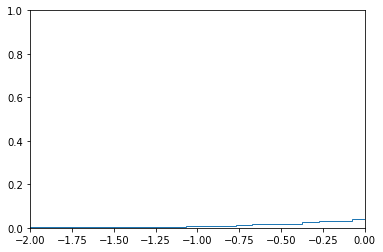

In [20]:
#hacemos zoom: el error

plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

In [21]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)

('production_budget', 1.362075868346687)
('title_year', 180279.60944561585)
('aspect_ratio', -34619310.357244015)
('duration.1', 287967.7263264876)
('cast_total_facebook_likes', -142.15147628596915)
('budget', -0.0025284433375094)
('imdb_score', 25933090.413362432)
('opening_gross', 5.811558761819225)
('screens', -12070.051729808667)
